In [1]:
import pandas as pd
import numpy as np
import wrds
import seaborn as sns
import os
import io
import dateutil
import collections
import time
from datetime import datetime
#import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
db= wrds.Connection(wrds_username='serqas23')

/Users/sergesondji/anaconda2/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Enter your WRDS username [sergesondji]:serqas23
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [3]:
Start_year = 1980
End_year = 2018

In [4]:
Query_string ="select gvkey,fyear,tic,conm,at,bkvlps,cogs,dvt,ib,lt,ni,revt,sale,seq from comp.funda where gvkey='005073' OR gvkey='009563' OR gvkey='006066' OR gvkey='007875' OR gvkey='002176' OR gvkey='009667' OR gvkey='005047' OR gvkey='004839' OR gvkey='003022'  OR gvkey='006307' OR gvkey='011259'OR gvkey='007585' OR gvkey='005606' OR gvkey='003282' OR gvkey='005680' OR gvkey='006829' OR gvkey='004503'  OR gvkey='009899' OR gvkey='002136' OR gvkey='003813' OR gvkey='002991'"

In [5]:
Full_db = db.raw_sql(Query_string)

In [6]:
years = list(range(Start_year,End_year))

In [7]:
DBfrom1980to2017 = Full_db[Full_db.fyear.isin(years)]

In [8]:
gvkeylist = set(DBfrom1980to2017['gvkey'].tolist())


In [9]:
DBfrom1980to2017nonans = DBfrom1980to2017.dropna(axis=0, how='any')


AT -- Assets - Total BKVLPS -- Book Value Per Share

COGS -- Cost of Goods Sold DVT -- Dividends - Total

IB -- Income Before Extraordinary Items LT -- Liabilities - Total

NI -- Net Income (Loss) REVT -- Revenue - Total SALE -- Sales/Turnover (Net)

SEQ -- Stockholders' Equity - Total


In [10]:
DBfrom1980to2017nonans = DBfrom1980to2017nonans.reset_index(drop=True)
DBfrom1980to2017nonans.head()


,gvkey,fyear,tic,conm,at,bkvlps,cogs,dvt,ib,lt,ni,revt,sale,seq
0,002136,1984.0,VZ,VERIZON COMMUNICATIONS INC,18684.203,75.3744,4781.371,628.8,973.1,11175.799,973.1,8090.051,8090.051,7508.499
1,002136,1985.0,VZ,VERIZON COMMUNICATIONS INC,19788.305,79.3134,5288.445,678.7,1092.9,11867.095,1092.9,9084.145,9084.145,7921.270
2,002136,1986.0,VZ,VERIZON COMMUNICATIONS INC,21090.805,41.8186,5576.496,717.3,1167.1,12770.197,1167.1,9920.797,9920.797,8320.697
3,002136,1987.0,VZ,VERIZON COMMUNICATIONS INC,21245.100,44.1303,5860.800,762.3,1240.4,12503.200,1240.4,10298.400,10298.400,8741.900
4,002136,1988.0,VZ,VERIZON COMMUNICATIONS INC,24729.200,46.5787,6119.500,806.3,1316.8,15552.500,1316.8,10880.100,10880.100,9176.700


In [11]:
# not using sale because it is the same feature as revenue 'revt'
features = ['at', 'bkvlps', 'cogs', 'dvt','ib','lt','ni','revt','seq']
# Separating out the features
x = DBfrom1980to2017nonans.loc[:, features].values
#Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
pca = PCA(n_components=2)
principalcomp= pca.fit_transform(x)
principalDF= pd.DataFrame (data=principalcomp, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF.head()


,Principal Component 1,Principal Component 2
0,-1.459780,0.109491
1,-1.426590,0.115348
2,-1.399866,0.116784
3,-1.380717,0.124487
4,-1.341460,0.105714


In [13]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.59694824 0.12515212]


In [14]:
FinalDF= pd.concat([principalDF,DBfrom1980to2017nonans[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF.head()


,Principal Component 1,Principal Component 2,conm,fyear
261,-1.259304,0.227385,GENERAL ELECTRIC CO,1980.0
34,-1.826908,0.109698,BERKSHIRE HATHAWAY,1980.0
375,-1.844608,0.132817,HOME DEPOT INC,1980.0
337,-1.773815,0.150873,HP INC,1980.0
527,-1.779507,0.143753,MOTOROLA SOLUTIONS INC,1980.0


In [15]:
CompanyList=set(DBfrom1980to2017nonans['conm'].tolist())
CompanyList

{u'AT&T INC',
 u'BERKSHIRE HATHAWAY',
 u'CHEVRON CORP',
 u'CHRYSLER CORP',
 u'COMPAQ COMPUTER CORP',
 u'EXXON MOBIL CORP',
 u'FORD MOTOR CO',
 u'GENERAL ELECTRIC CO',
 u'GENERAL MOTORS CO',
 u'HOME DEPOT INC',
 u'HP INC',
 u'INTL BUSINESS MACHINES CORP',
 u"LOWE'S COMPANIES INC",
 u'MOTOROLA SOLUTIONS INC',
 u'NEWELL BRANDS INC',
 u'SEARS HOLDINGS CORP',
 u'SEARS ROEBUCK & CO',
 u'SHERWIN-WILLIAMS CO',
 u'TARGET CORP',
 u'VERIZON COMMUNICATIONS INC',
 u'WALMART INC'}

In [16]:
Telecommunication = ['AT&T INC','VERIZON COMMUNICATIONS INC','MOTOROLA SOLUTIONS INC']
Oil = ['CHEVRON CORP','SHELL OIL CO','EXXON MOBIL CORP']
Auto =['CHRYSLER CORP','FORD MOTOR CO','GENERAL MOTORS CO']
Hardware = ["LOWE'S COMPANIES INC",'SHERWIN-WILLIAMS CO','HOME DEPOT INC']
Retail = ['WALMART INC','SEARS ROEBUCK & CO','TARGET CORP']
Conglomerate = ['GENERAL ELECTRIC CO','NEWELL BRANDS INC','BERKSHIRE HATHAWAY']
Computer = ['INTL BUSINESS MACHINES CORP','COMPAQ COMPUTER CORP','HP INC']

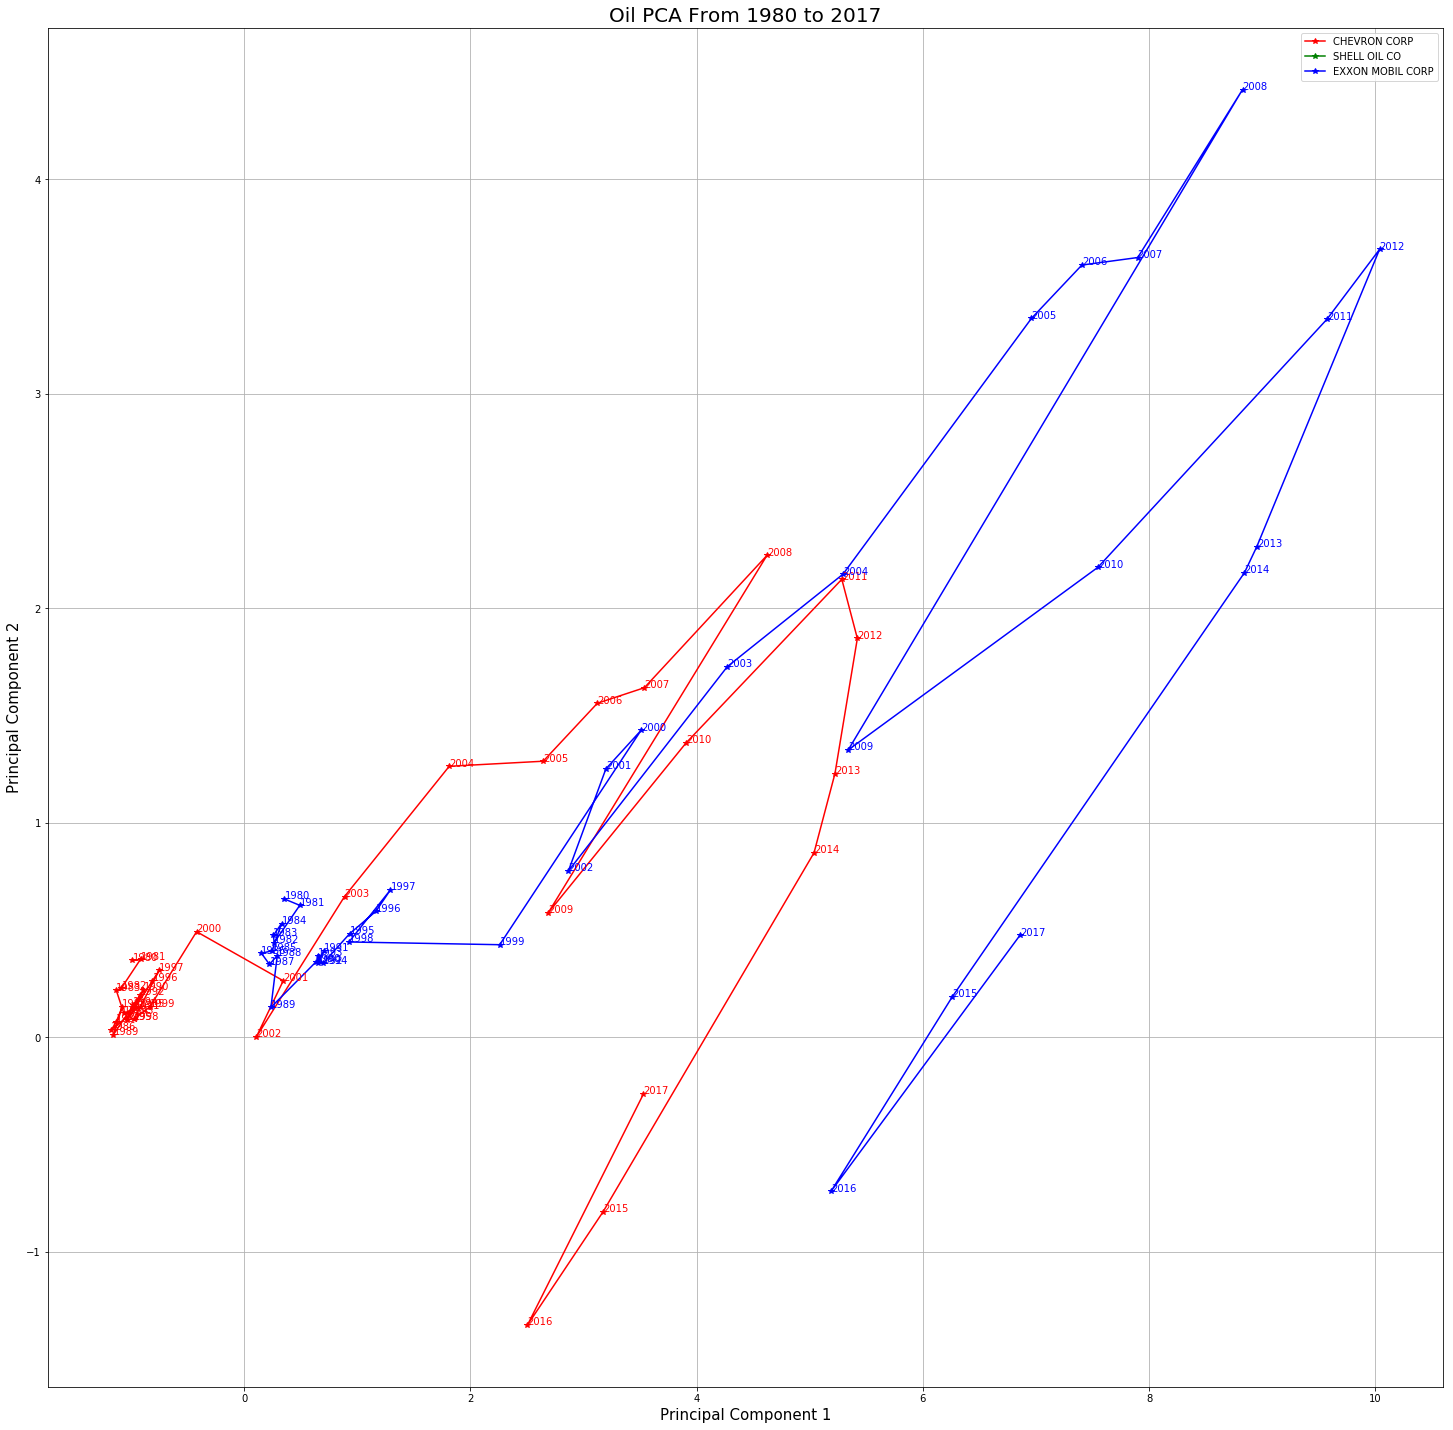

In [17]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware

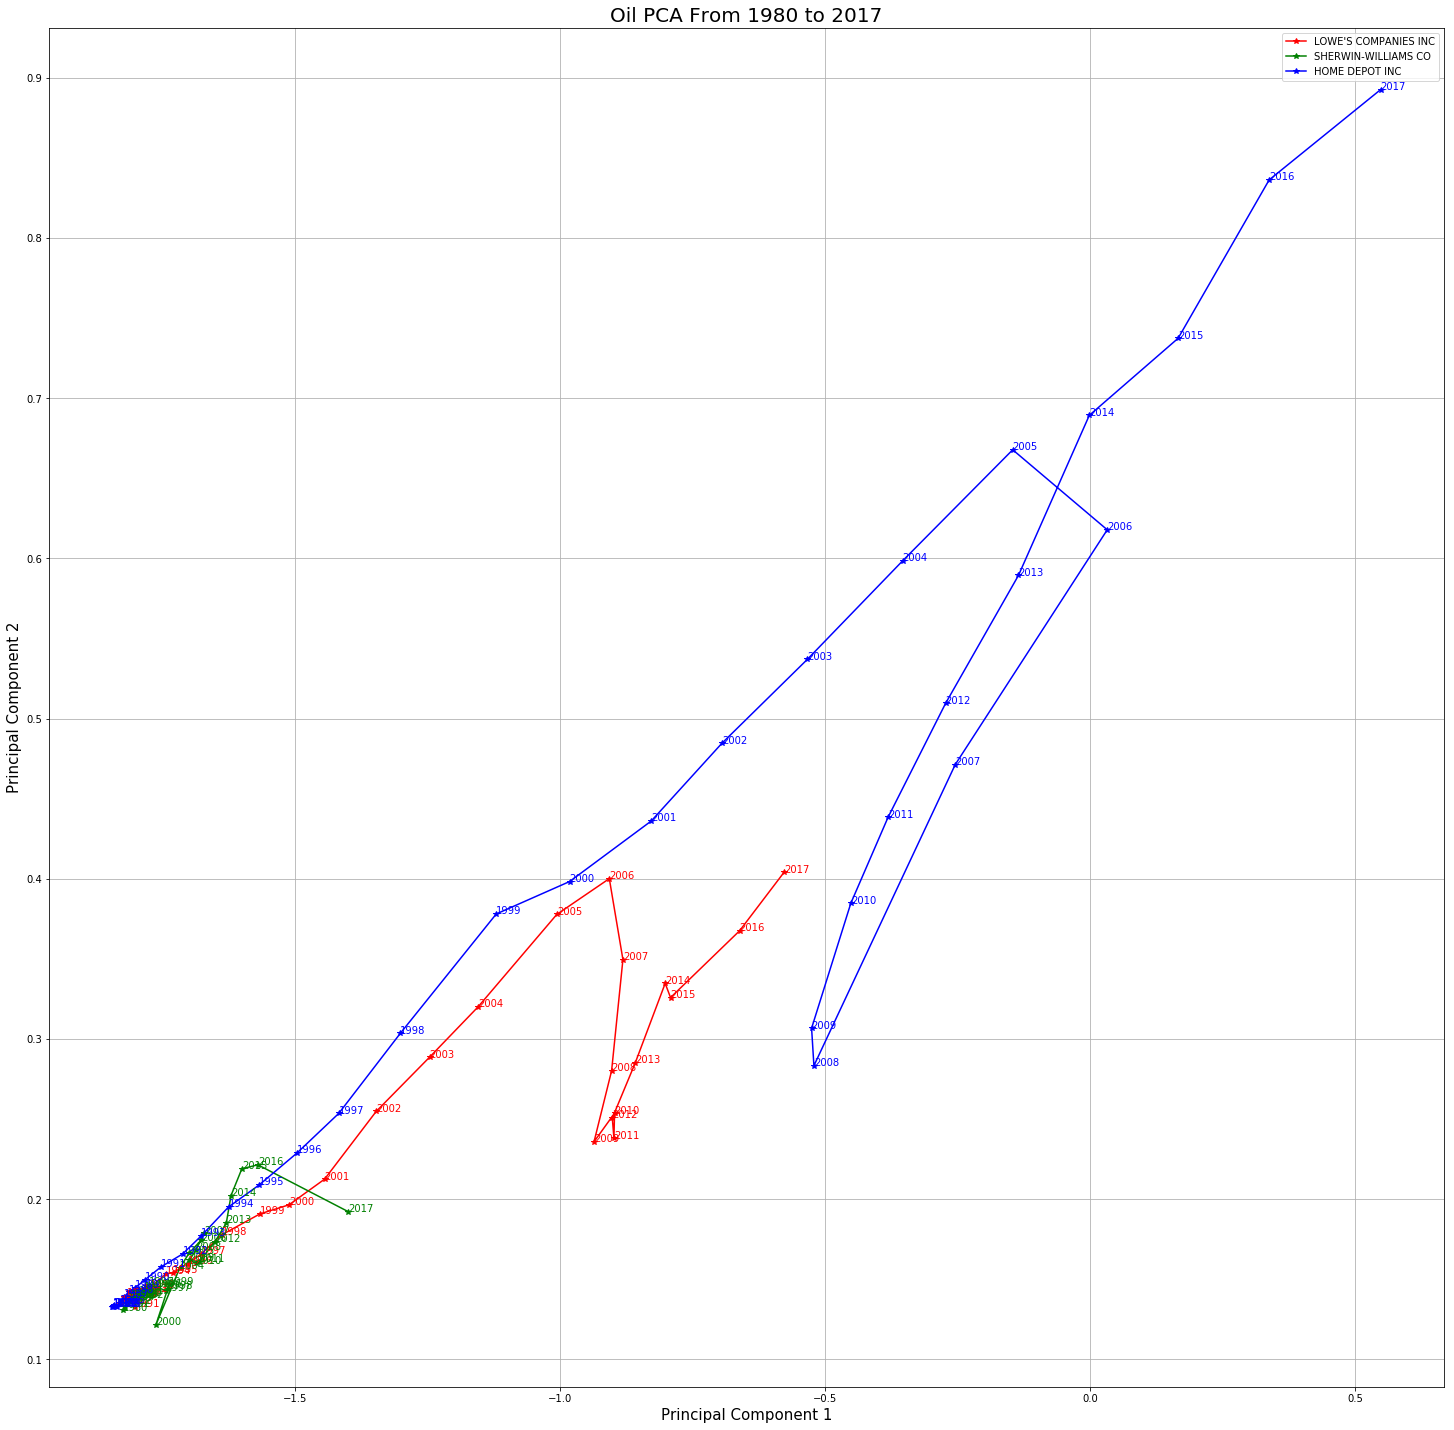

In [18]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DBfrom1980to2017nonans['conm'] == company
    plt.plot(FinalDF.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Ratio: On Total Asset

In [19]:
DB_TA_Ratio=DBfrom1980to2017nonans
DB_TA_Ratio
DB_TA_Ratio['at1']=DB_TA_Ratio['at']/DB_TA_Ratio['at']
DB_TA_Ratio['bkvlps1']=DB_TA_Ratio['bkvlps']/DB_TA_Ratio['at']
DB_TA_Ratio['cogs1']=DB_TA_Ratio['cogs']/DB_TA_Ratio['at']
DB_TA_Ratio['dvt1']=DB_TA_Ratio['dvt']/DB_TA_Ratio['at']
DB_TA_Ratio['ib1']=DB_TA_Ratio['ib']/DB_TA_Ratio['at']
DB_TA_Ratio['lt1']=DB_TA_Ratio['lt']/DB_TA_Ratio['at']
DB_TA_Ratio['ni1']=DB_TA_Ratio['ni']/DB_TA_Ratio['at']
DB_TA_Ratio['revt1']=DB_TA_Ratio['revt']/DB_TA_Ratio['at']
DB_TA_Ratio['seq1']=DB_TA_Ratio['seq']/DB_TA_Ratio['at']

DB_TA_Ratio.head()

,gvkey,fyear,tic,conm,at,bkvlps,cogs,dvt,ib,lt,...,seq,at1,bkvlps1,cogs1,dvt1,ib1,lt1,ni1,revt1,seq1
0,002136,1984.0,VZ,VERIZON COMMUNICATIONS INC,18684.203,75.3744,4781.371,628.8,973.1,11175.799,...,7508.499,1.0,0.004034,0.255904,0.033654,0.052081,0.598142,0.052081,0.432989,0.401863
1,002136,1985.0,VZ,VERIZON COMMUNICATIONS INC,19788.305,79.3134,5288.445,678.7,1092.9,11867.095,...,7921.270,1.0,0.004008,0.267251,0.034298,0.055230,0.599702,0.055230,0.459066,0.400301
2,002136,1986.0,VZ,VERIZON COMMUNICATIONS INC,21090.805,41.8186,5576.496,717.3,1167.1,12770.197,...,8320.697,1.0,0.001983,0.264404,0.034010,0.055337,0.605486,0.055337,0.470385,0.394518
3,002136,1987.0,VZ,VERIZON COMMUNICATIONS INC,21245.100,44.1303,5860.800,762.3,1240.4,12503.200,...,8741.900,1.0,0.002077,0.275866,0.035881,0.058385,0.588522,0.058385,0.484742,0.411478
4,002136,1988.0,VZ,VERIZON COMMUNICATIONS INC,24729.200,46.5787,6119.500,806.3,1316.8,15552.500,...,9176.700,1.0,0.001884,0.247460,0.032605,0.053249,0.628912,0.053249,0.439970,0.371088


In [20]:
features1 = ['at1', 'bkvlps1', 'cogs1', 'dvt1','ib1','lt1','ni1','revt1','seq1']
# Separating out the features
x1 = DB_TA_Ratio.loc[:, features1].values
# Standardizing the features
x1 = StandardScaler().fit_transform(x1)


In [21]:
pca = PCA(n_components=2)
principalcomp1= pca.fit_transform(x1)
principalDF1= pd.DataFrame (data=principalcomp1, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF1.head()



,Principal Component 1,Principal Component 2
0,0.318544,-1.550564
1,0.257165,-1.541402
2,0.284389,-1.514290
3,0.121771,-1.563320
4,0.470261,-1.485883


In [22]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.39850888 0.235948  ]


In [23]:
FinalDF1= pd.concat([principalDF1,DB_TA_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF1.head()



,Principal Component 1,Principal Component 2,conm,fyear
261,-1.092328,-0.277366,GENERAL ELECTRIC CO,1980.0
34,0.637332,-2.397110,BERKSHIRE HATHAWAY,1980.0
375,-3.877430,5.841132,HOME DEPOT INC,1980.0
337,-2.218984,-0.967158,HP INC,1980.0
527,-1.533973,-0.349232,MOTOROLA SOLUTIONS INC,1980.0


## Oil Plot

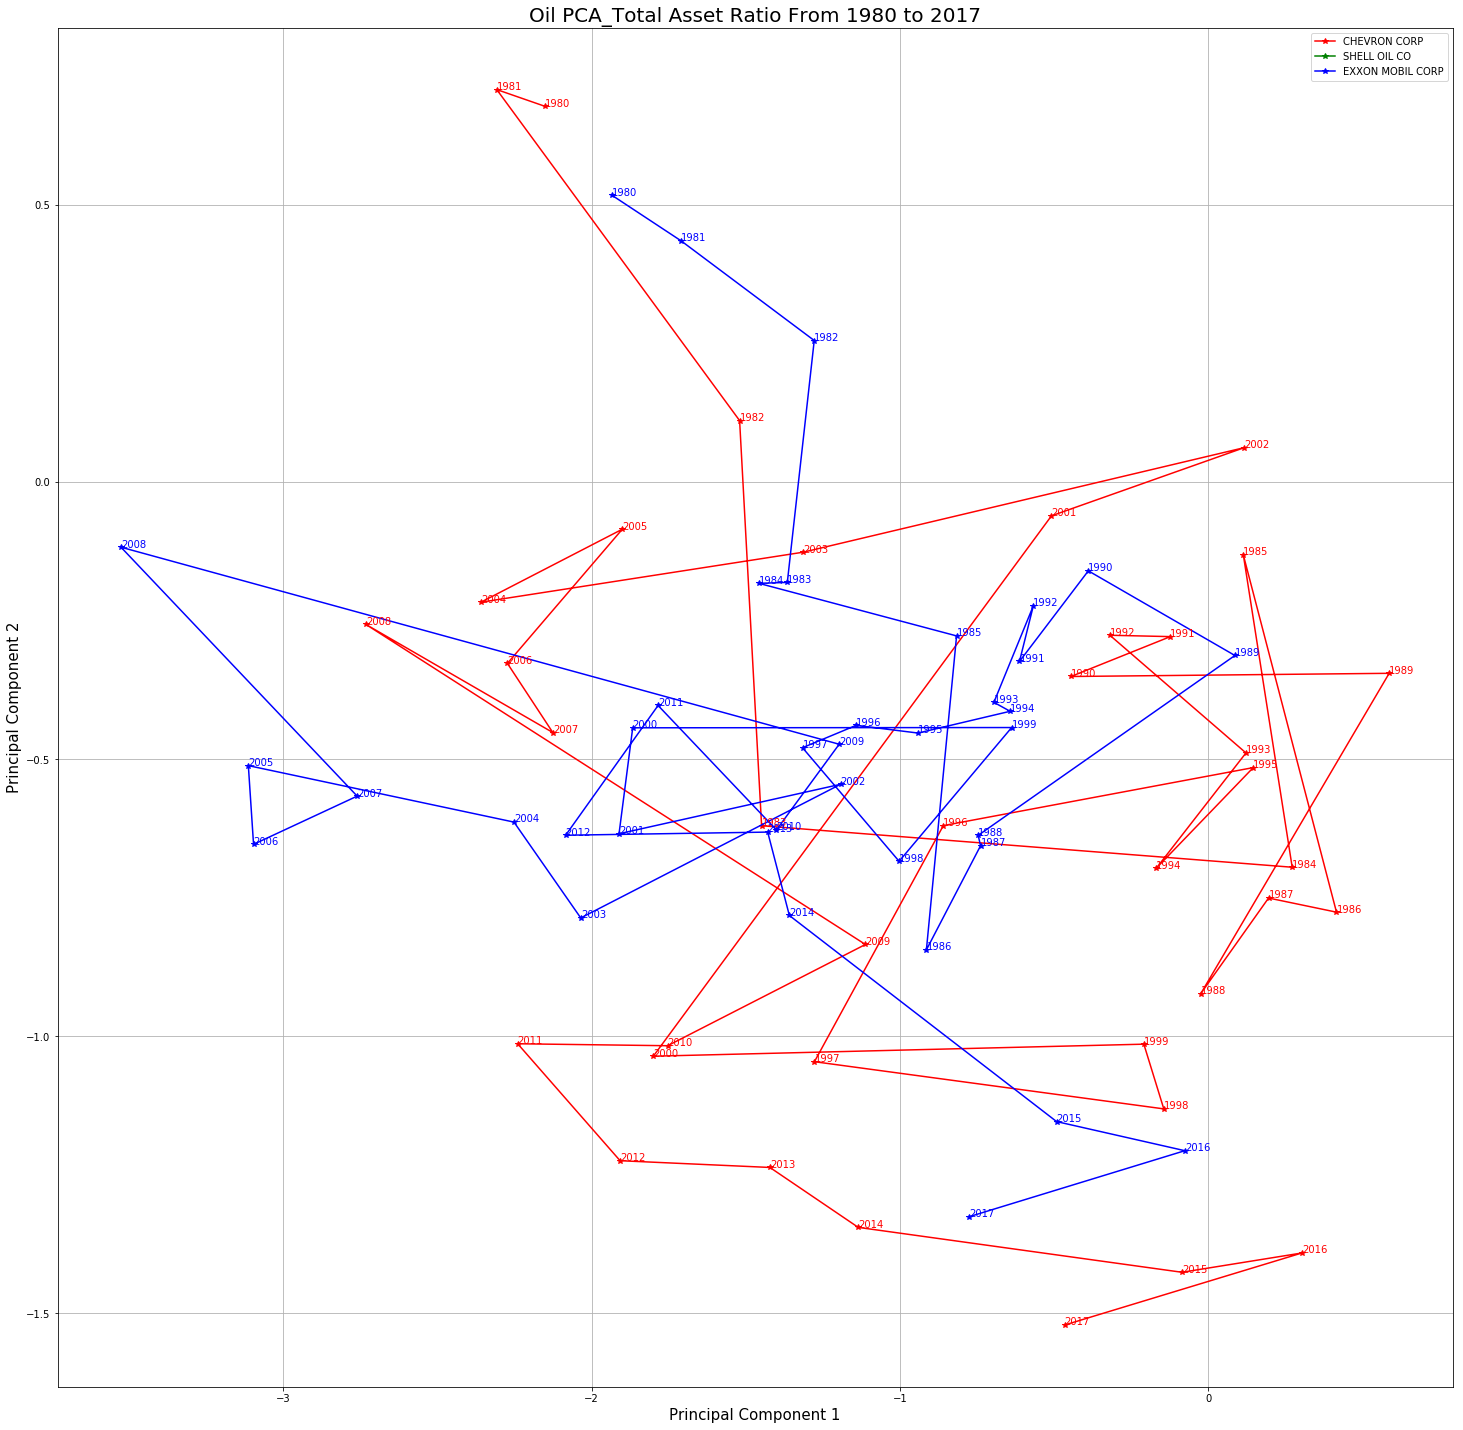

In [24]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA_Total Asset Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

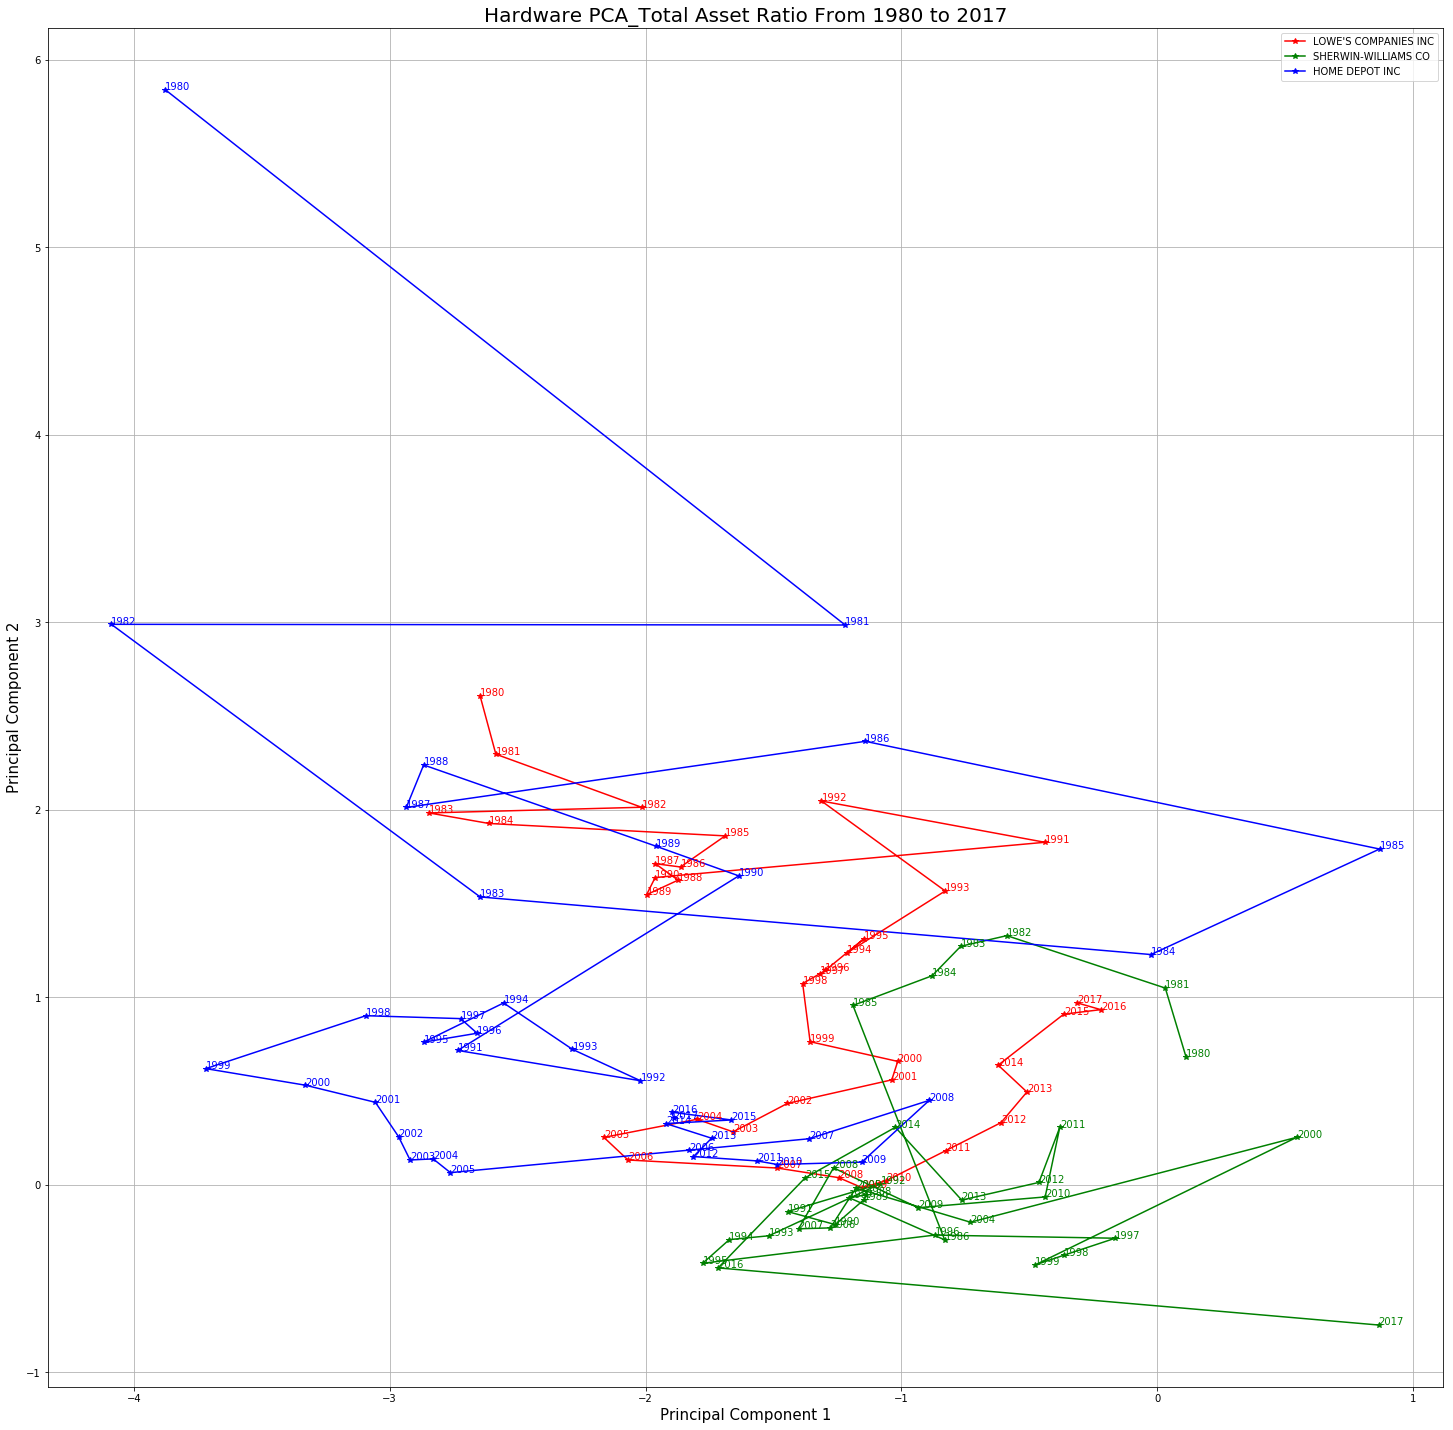

In [25]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware PCA_Total Asset Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(FinalDF1.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF1.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF1.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF1.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF1.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## t-Distributed Stochastic Neighbouring Entities (t-SNE)

In [26]:
features1 = ['at1', 'bkvlps1', 'cogs1', 'dvt1','ib1','lt1','ni1','revt1','seq1']
# Separating out the features
x2 = DB_TA_Ratio.loc[:, features1].values
# Standardizing the features
x2 = StandardScaler().fit_transform(x2)



In [27]:
X_embedded = TSNE(n_components=2).fit_transform(x2)
X_embedded


array([[-24.677906 ,   5.2582064],
       [-24.08749  ,   5.565862 ],
       [-24.129463 ,   5.0916505],
       ...,
       [ 31.766853 ,  -9.084388 ],
       [ 31.209236 ,  -8.962132 ],
       [ 30.172112 ,  -8.971033 ]], dtype=float32)

In [28]:
tSNEDF= pd.DataFrame (data=X_embedded, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF.head()



,Principal Component 1,Principal Component 2
0,-24.677906,5.258206
1,-24.087490,5.565862
2,-24.129463,5.091650
3,-23.360765,5.593856
4,-24.754808,3.310758


In [29]:
tsNEDF_Final= pd.concat([tSNEDF,DB_TA_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final.head()



,Principal Component 1,Principal Component 2,conm,fyear
261,-4.701565,15.810479,GENERAL ELECTRIC CO,1980.0
34,-46.101643,31.573351,BERKSHIRE HATHAWAY,1980.0
375,41.814434,-3.606109,HOME DEPOT INC,1980.0
337,20.894867,11.663922,HP INC,1980.0
527,11.233502,13.008674,MOTOROLA SOLUTIONS INC,1980.0


## Oil Plot

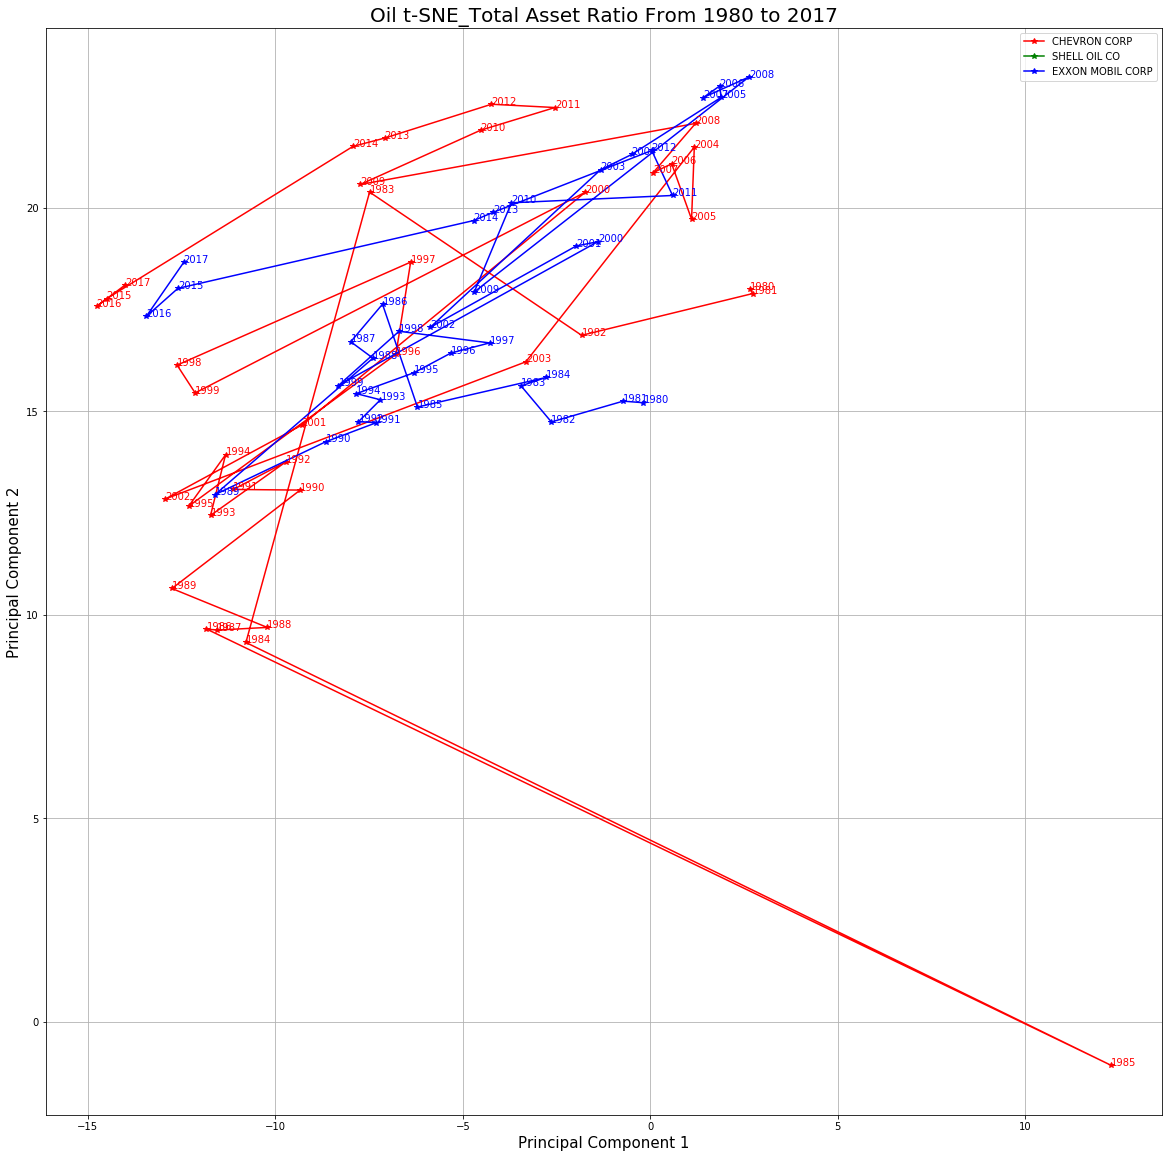

In [30]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE_Total Asset Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

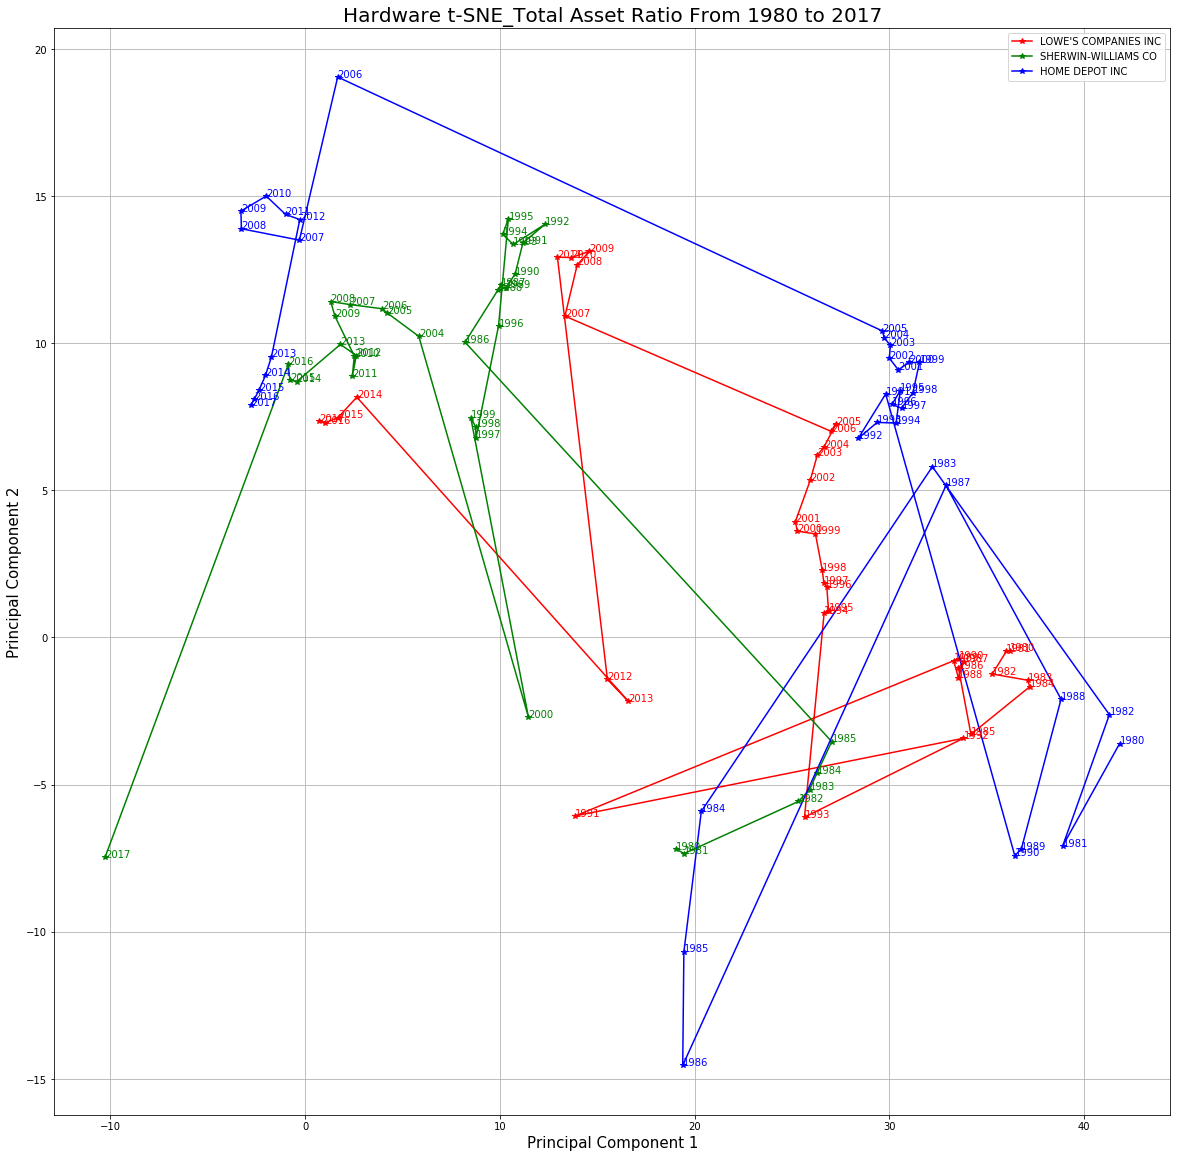

In [31]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware t-SNE_Total Asset Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TA_Ratio['conm'] == company
    plt.plot(tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Ratio on Total Revenue

In [32]:
DB_TR_Ratio=DBfrom1980to2017nonans
DB_TR_Ratio
DB_TR_Ratio['at1']=DB_TR_Ratio['at']/DB_TR_Ratio['revt']
DB_TR_Ratio['bkvlps1']=DB_TR_Ratio['bkvlps']/DB_TR_Ratio['revt']
DB_TR_Ratio['cogs1']=DB_TR_Ratio['cogs']/DB_TR_Ratio['revt']
DB_TR_Ratio['dvt1']=DB_TR_Ratio['dvt']/DB_TR_Ratio['revt']
DB_TR_Ratio['ib1']=DB_TR_Ratio['ib']/DB_TR_Ratio['revt']
DB_TR_Ratio['lt1']=DB_TR_Ratio['lt']/DB_TR_Ratio['revt']
DB_TR_Ratio['ni1']=DB_TR_Ratio['ni']/DB_TR_Ratio['revt']
DB_TR_Ratio['revt1']=DB_TR_Ratio['revt']/DB_TR_Ratio['revt']
DB_TR_Ratio['seq1']=DB_TR_Ratio['seq']/DB_TR_Ratio['revt']

DB_TR_Ratio.head()

,gvkey,fyear,tic,conm,at,bkvlps,cogs,dvt,ib,lt,...,seq,at1,bkvlps1,cogs1,dvt1,ib1,lt1,ni1,revt1,seq1
0,002136,1984.0,VZ,VERIZON COMMUNICATIONS INC,18684.203,75.3744,4781.371,628.8,973.1,11175.799,...,7508.499,2.309528,0.009317,0.591019,0.077725,0.120284,1.381425,0.120284,1.0,0.928115
1,002136,1985.0,VZ,VERIZON COMMUNICATIONS INC,19788.305,79.3134,5288.445,678.7,1092.9,11867.095,...,7921.270,2.178334,0.008731,0.582162,0.074713,0.120309,1.306352,0.120309,1.0,0.871989
2,002136,1986.0,VZ,VERIZON COMMUNICATIONS INC,21090.805,41.8186,5576.496,717.3,1167.1,12770.197,...,8320.697,2.125918,0.004215,0.562102,0.072303,0.117642,1.287215,0.117642,1.0,0.838713
3,002136,1987.0,VZ,VERIZON COMMUNICATIONS INC,21245.100,44.1303,5860.800,762.3,1240.4,12503.200,...,8741.900,2.062952,0.004285,0.569098,0.074021,0.120446,1.214092,0.120446,1.0,0.848860
4,002136,1988.0,VZ,VERIZON COMMUNICATIONS INC,24729.200,46.5787,6119.500,806.3,1316.8,15552.500,...,9176.700,2.272884,0.004281,0.562449,0.074108,0.121028,1.429445,0.121028,1.0,0.843439


In [33]:
features1 = ['at1', 'bkvlps1', 'cogs1', 'dvt1','ib1','lt1','ni1','revt1','seq1']
# Separating out the features
x3 = DB_TR_Ratio.loc[:, features1].values
# Standardizing the features
x3 = StandardScaler().fit_transform(x3)



In [34]:
pca = PCA(n_components=2)
principalcomp2= pca.fit_transform(x3)
principalDF2= pd.DataFrame (data=principalcomp2, columns= ['Principal Component 1', 'Principal Component 2'])
principalDF2.head()



,Principal Component 1,Principal Component 2
0,2.666043,-1.523719
1,2.493307,-1.557162
2,2.394555,-1.600361
3,2.381059,-1.639942
4,2.592872,-1.624142


In [35]:
FinalDF2= pd.concat([principalDF2,DB_TR_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
FinalDF2.head()



,Principal Component 1,Principal Component 2,conm,fyear
261,-0.520132,-0.298090,GENERAL ELECTRIC CO,1980.0
34,1.906686,2.896956,BERKSHIRE HATHAWAY,1980.0
375,-1.776820,0.136627,HOME DEPOT INC,1980.0
337,0.017392,-0.875133,HP INC,1980.0
527,-0.522017,-0.430937,MOTOROLA SOLUTIONS INC,1980.0


## Oil Plot

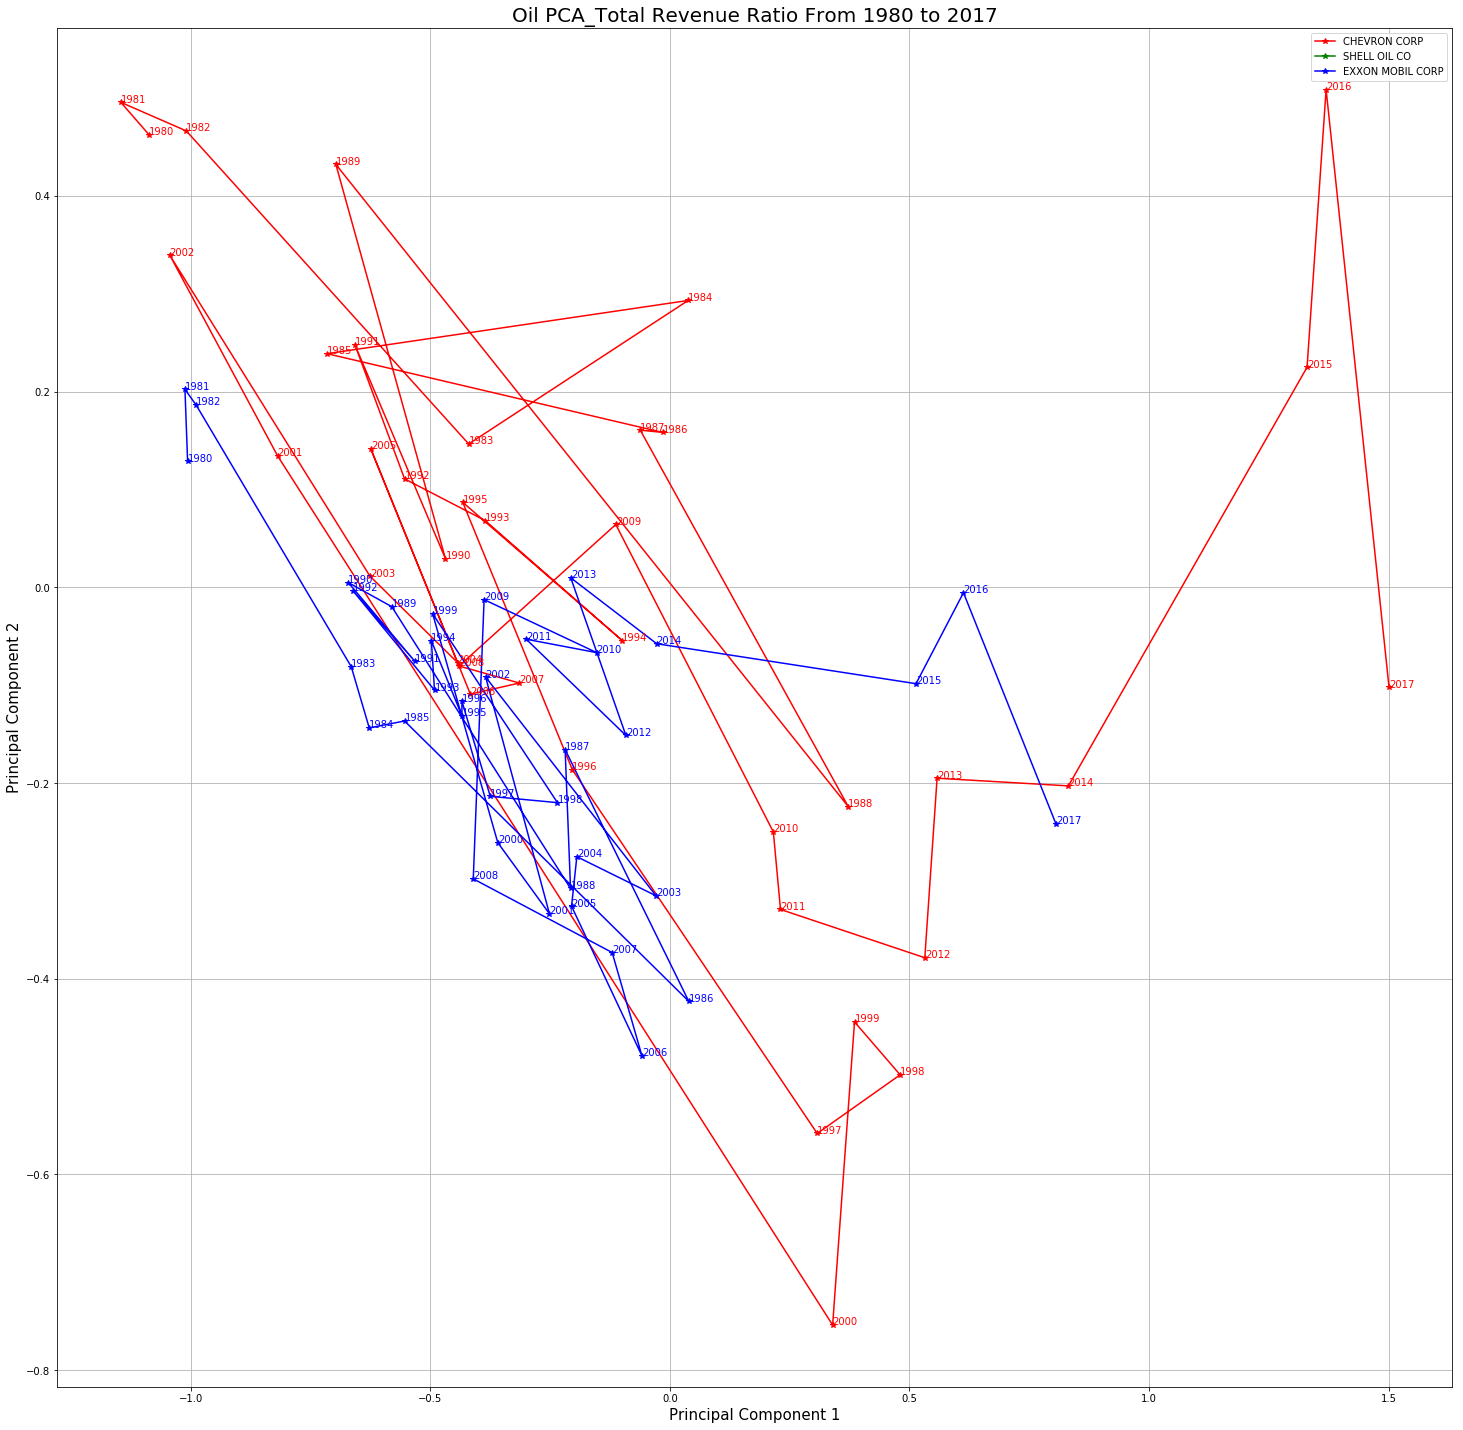

In [36]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA_Total Revenue Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TR_Ratio['conm'] == company
    plt.plot(FinalDF2.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF2.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF2.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF2.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF2.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

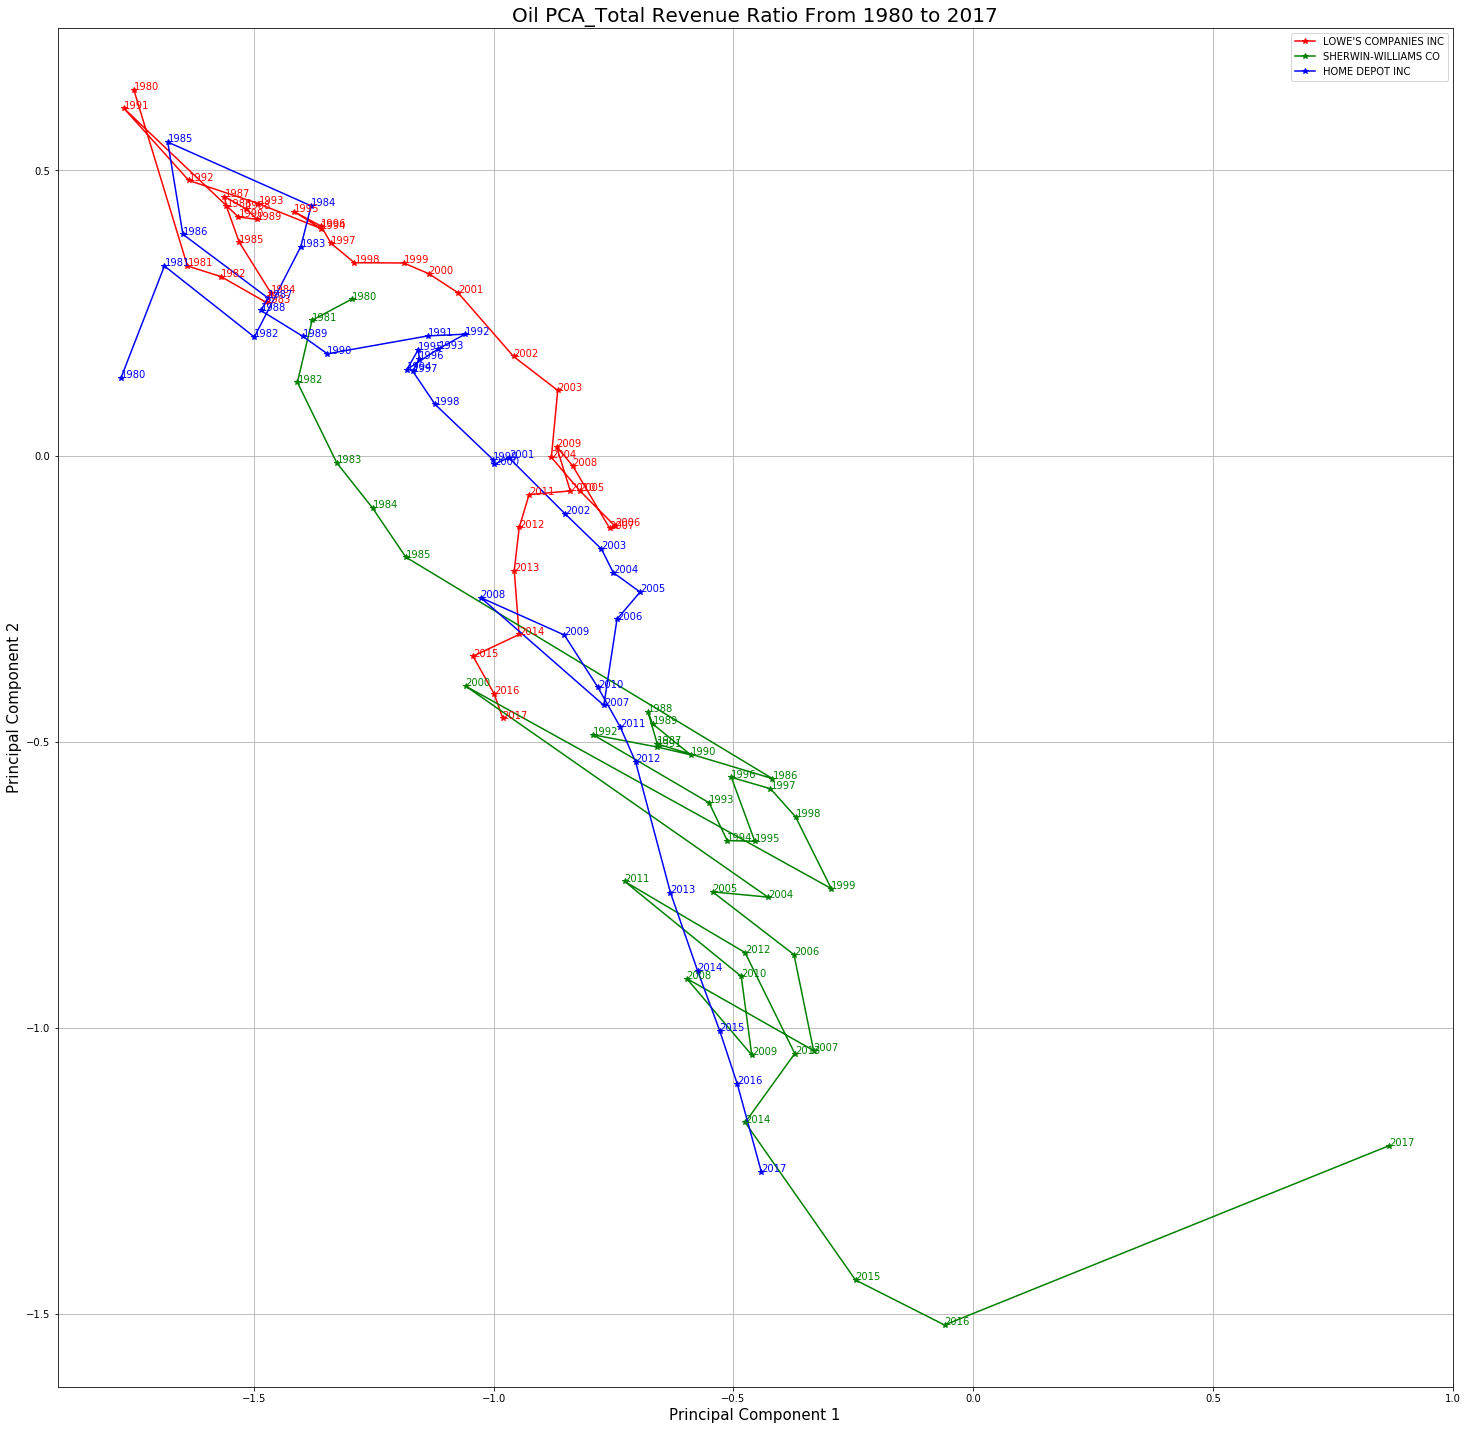

In [37]:
fig = plt.figure(figsize = (25,25))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil PCA_Total Revenue Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TR_Ratio['conm'] == company
    plt.plot(FinalDF2.loc[indicesToKeep, 'Principal Component 1']
               , FinalDF2.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            FinalDF2.loc[indicesToKeep, 'Principal Component 1'],
            FinalDF2.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in FinalDF2.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## t-Distributed Stochastic Neighbouring Entities (t-SNE)

In [38]:
features1 = ['at1', 'bkvlps1', 'cogs1', 'dvt1','ib1','lt1','ni1','revt1','seq1']
# Separating out the features
x4 = DB_TR_Ratio.loc[:, features1].values
# Standardizing the features
x4 = StandardScaler().fit_transform(x4)

In [39]:
X_embedded2 = TSNE(n_components=2).fit_transform(x4)
X_embedded2



array([[ 28.357412,  21.491947],
       [ 28.154608,  21.988243],
       [ 27.703905,  21.682053],
       ...,
       [ -9.30309 , -21.468756],
       [ -9.425143, -20.878275],
       [-10.874422, -19.407122]], dtype=float32)

In [40]:
tSNEDF2= pd.DataFrame (data=X_embedded2, columns= ['Principal Component 1', 'Principal Component 2'])
tSNEDF2.head()



,Principal Component 1,Principal Component 2
0,28.357412,21.491947
1,28.154608,21.988243
2,27.703905,21.682053
3,27.953859,22.181402
4,27.880552,21.149956


In [41]:
tsNEDF_Final2= pd.concat([tSNEDF2,DB_TR_Ratio[['conm','fyear']] ], axis=1).sort_values('fyear')
tsNEDF_Final2.head()



,Principal Component 1,Principal Component 2,conm,fyear
261,2.499299,3.144558,GENERAL ELECTRIC CO,1980.0
34,-7.825716,34.681488,BERKSHIRE HATHAWAY,1980.0
375,-2.846316,-31.595592,HOME DEPOT INC,1980.0
337,24.625584,-6.978043,HP INC,1980.0
527,15.736386,-9.547178,MOTOROLA SOLUTIONS INC,1980.0


## Oil Plot

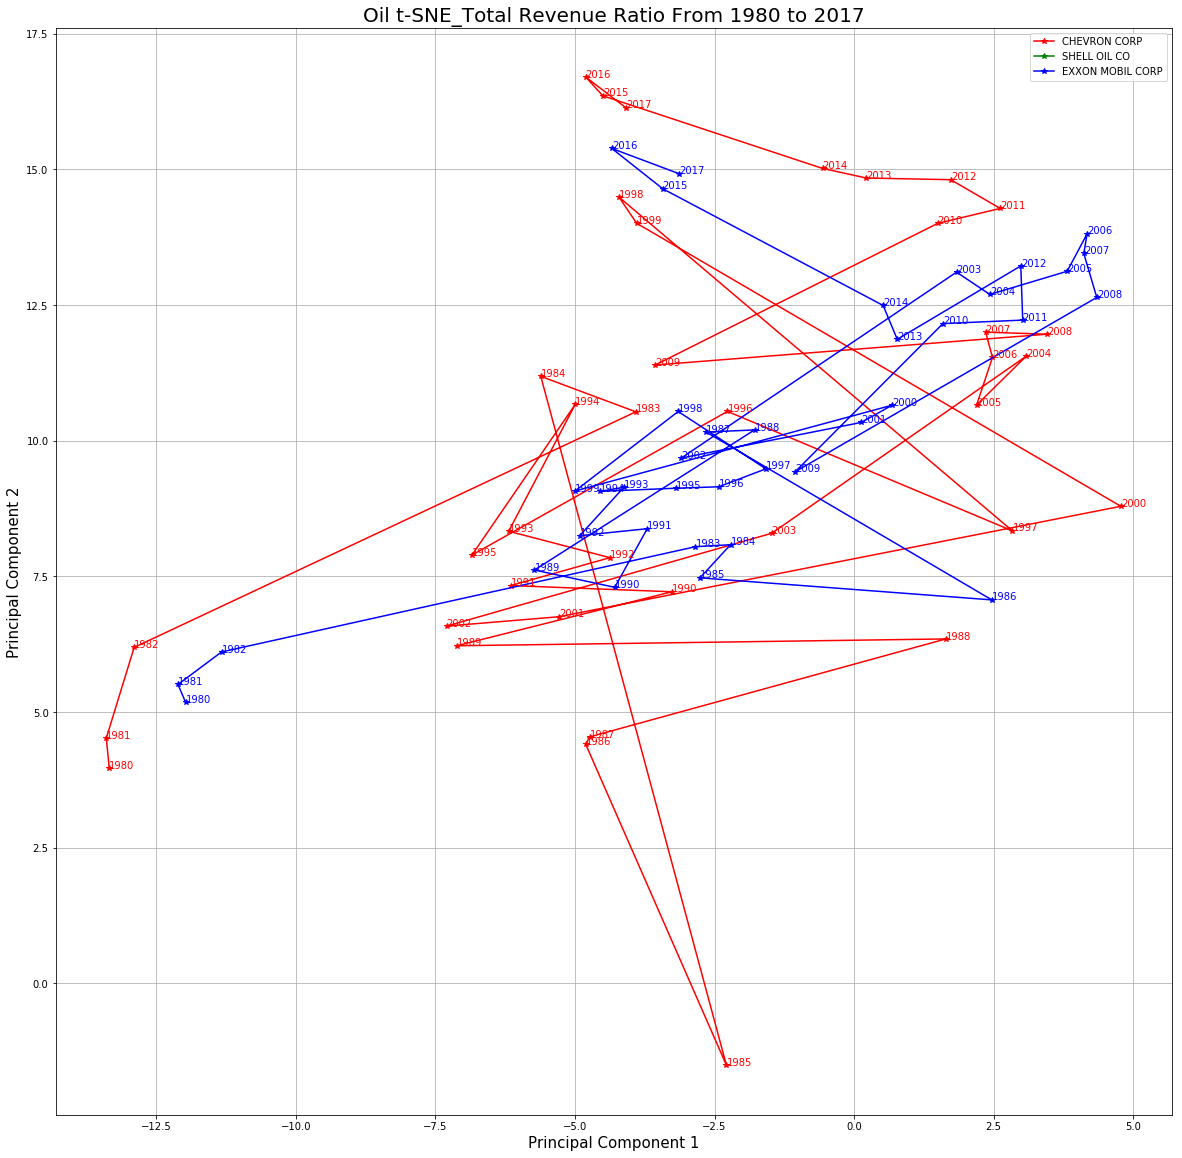

In [42]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Oil t-SNE_Total Revenue Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Oil
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TR_Ratio['conm'] == company
    plt.plot(tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final2.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()

## Hardware Plot

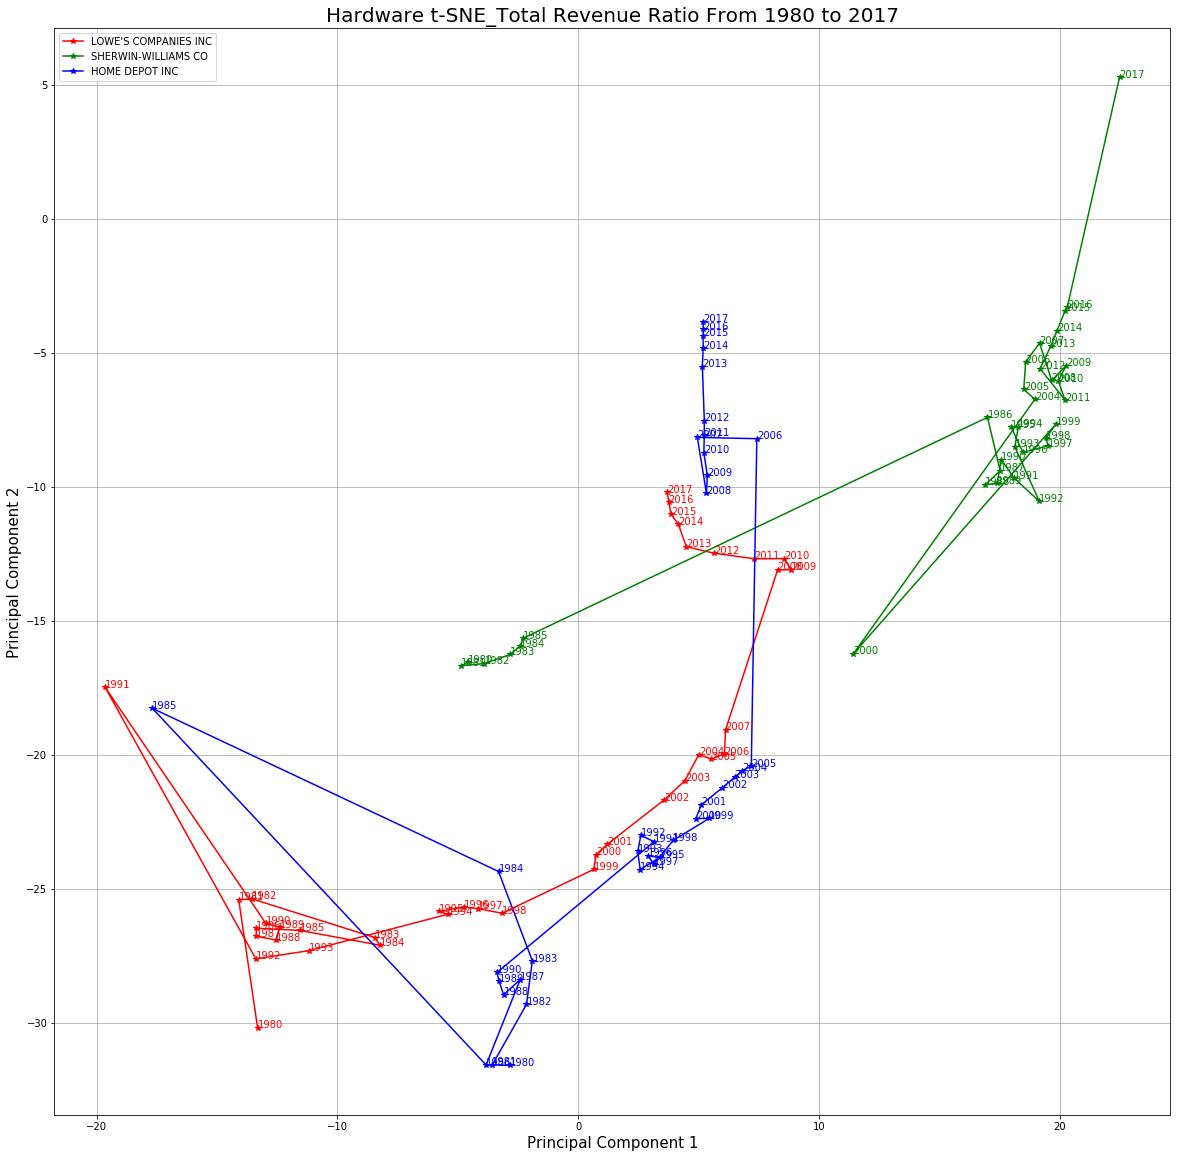

In [43]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Hardware t-SNE_Total Revenue Ratio From 1980 to 2017', fontsize = 20)
CompanyList = Hardware
colors = ['r','g','b']
for company, color in zip(CompanyList,colors):
    indicesToKeep = DB_TR_Ratio['conm'] == company
    plt.plot(tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 1']
               , tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 2']
               , '-*'
               , c = color)
    for ttxt in zip(
            tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 1'],
            tsNEDF_Final2.loc[indicesToKeep, 'Principal Component 2'],
            [ '%.0f'%y for y in tsNEDF_Final2.loc[indicesToKeep, 'fyear']]): 
        plt.text(ttxt[0], ttxt[1], ttxt[2], color = color)
ax.legend(CompanyList)
ax.grid()